# Animated Scatterplot

**Through this process an animated scatterplot is being formed to show the life expectancy and the fertility rate for each country vased on their population from 1800 till 2015**

## Starting witht the basics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the necessary files

Below there are files, which show the life expectancy and the fertility rate for each country in the world, according to their population each year during 1800 and 2015. Unfortunately, as there is a problem for accurate data in odler times, there is only collection per 10 years between 1800 and 1950.

In [6]:
life = pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col=0)
fert = pd.read_csv('gapminder_total_fertility.csv', index_col=0)
pop = pd.read_excel('gapminder_population.xlsx')
continents = pd.read_csv('continents.csv', sep=';')

## Observing the data (a bit)
There is an obvious difference between populaiton and life expectancy and fertility rate fiels. This occurs as for some countries we cannot have enough data for the above.

In [28]:
print(life.shape)
print(fert.shape)
print(pop.shape)
print(continents.shape)

(56420, 3)
(56160, 3)
(22275, 3)
(194, 3)


In [33]:
print(life.isna().count().to_list())
print(fert.isna().count().to_list())

[56420, 56420, 56420]
[56160, 56160, 56160]


# Manipulating and combining the data

Next step needed to be done is to change the data in a way to have a ' common denominator ' to compare them. That can be accomplished with making the country column as an index, as the country column is the same in each file

In [8]:
fert.columns = fert.columns.astype(int)

In [9]:
fert.index.name = 'country'

In [10]:
fert = fert.reset_index()

---
Melt function gives us the ability to sort our data according to a certain variable. As you can see here, fertility rate can be sorted based on the year of each coutnry. That process and reseting the index are being repeated below for the rest of the files we use

In [11]:
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')

In [12]:
continents = continents.reset_index()

In [13]:
life = life.reset_index()

In [14]:
life.rename(columns={'Life expectancy' : 'country'}, inplace=True)

In [15]:
life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy_rate')

In [16]:
pop.rename(columns={'Total population': 'country'}, inplace=True)

In [17]:
pop = pop.melt(id_vars='country', var_name='year', value_name='population')

--- 
# Merging the files


In [18]:
df = fert.merge(pop)

In [19]:
df = df.merge(life)

In [20]:
df = df.merge(continents)

# Scatterplot 
The following step is to form a scatterplot for each year. The size of the circle of each country is determined by its population and its colour and its shape by the continent the belong to

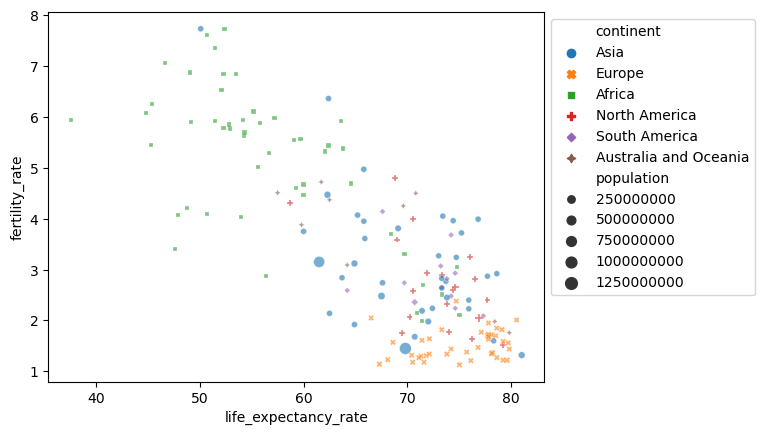

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

df_subset = df.loc[df['year'] == 2000]
sns.scatterplot(x='life_expectancy_rate', y='fertility_rate', size='population',hue='continent', style='continent',
            data=df_subset, alpha=0.6);
plt.legend(loc=2, bbox_to_anchor=(1,1));

In [27]:
for year in df['year'].unique():
    df_subset = df.loc[df['year'] == year]
    sns.scatterplot(x='life_expectancy_rate', y='fertility_rate', size='population', hue='continent', style = 'continent',
            data=df_subset, alpha=0.6);
    plt.axis((
        [df['life_expectancy_rate'].min(), df['life_expectancy_rate'].max(),
        df['fertility_rate'].min(), df['fertility_rate'].max()]
              ))
    lgd = plt.legend(loc=2, bbox_to_anchor=(1, 1));
    plt.savefig(f'lifeexp_{year}.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.clf();

<Figure size 640x480 with 0 Axes>

# Creating the animated scatterplot

In [40]:
import imageio

images = []

for i in range(1950,2015):
    filename = f'lifeexp_{i}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, duration=15)

C:\Users\vaggo\AppData\Local\Temp\ipykernel_11420\2366720263.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


# Application of the project

Based on the results given, we can extend the project by adding factors. For example, if we take into account any disease or ilness being the most prevalent each year affecting a person's pregnancy, the way of its transmition and so on, or enviromental factors affecting drastically the life, there can be observed the relations of them through this long time.